
## Pymc3/resources practice




In [ ]:
!pip3 install arviz
!pip3 install watermark
import arviz as az
import numpy as np
import pymc3 as pm

from matplotlib import pylab as plt
from scipy import stats

In [19]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%matplotlib inline
az.style.use("arviz-darkgrid")

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


# Hard

In [20]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])


## 3H1

Using grid approximation, compute the posterior distribution for the probability of a birth
being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior
probability?

0.5545545545545546

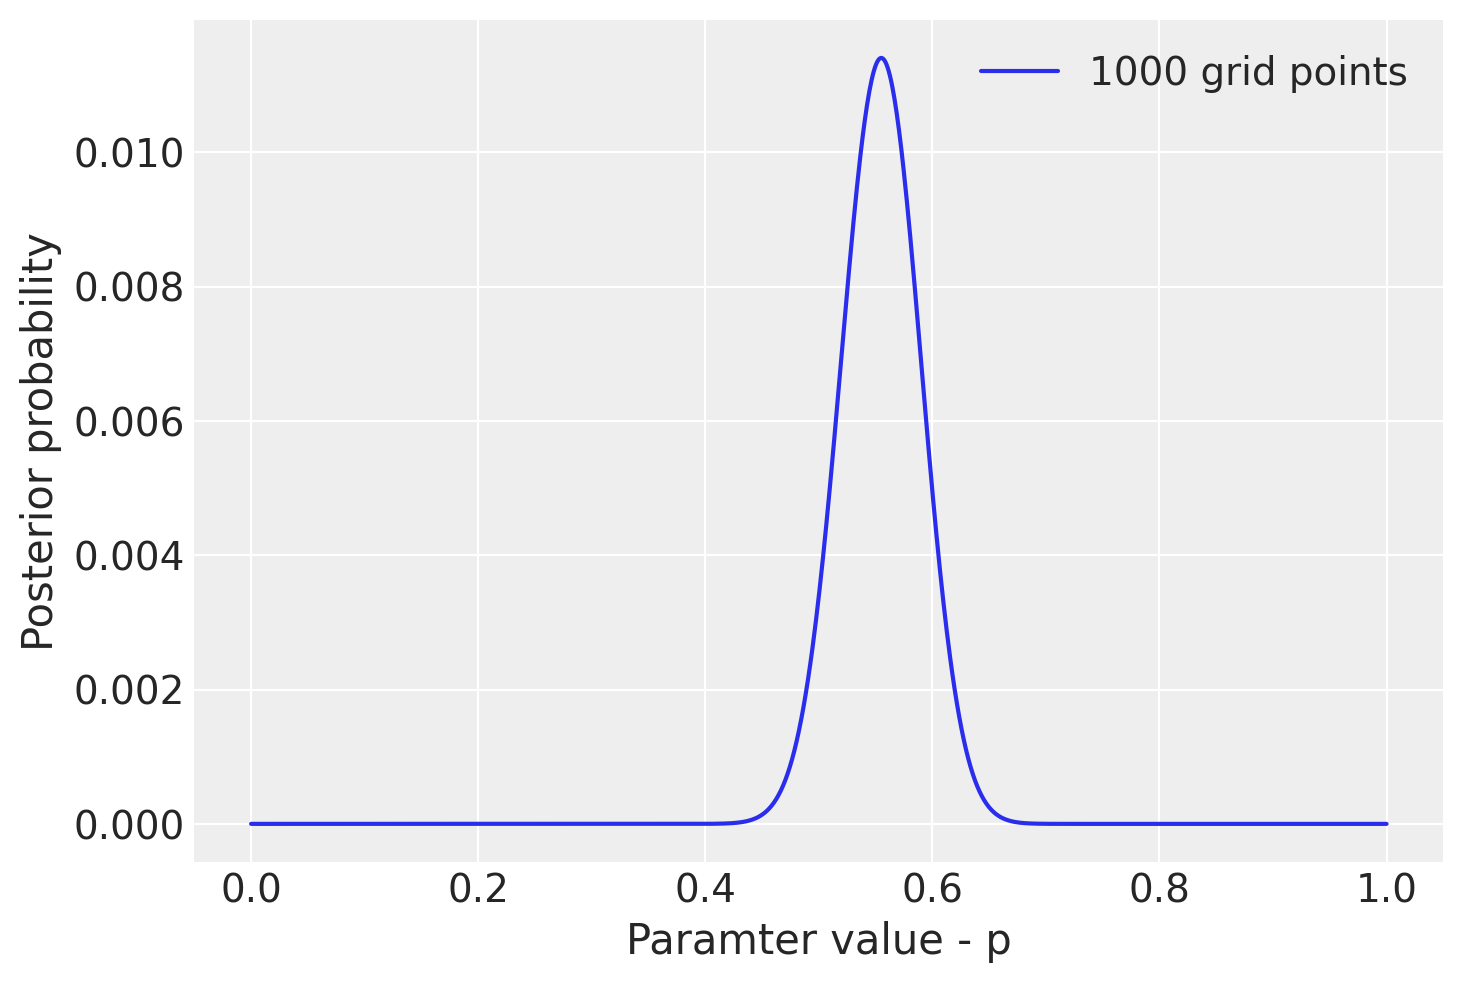

In [21]:
k = np.sum(birth1) + np.sum(birth2)
p = np.linspace(0, 1, 1000)
llh = stats.binom.pmf(k=k, n=200, p=p)
post = llh / np.sum(llh)

plt.plot(p, post, label=str(1000) + " grid points")
plt.xlabel("Paramter value - p")
plt.ylabel("Posterior probability")
plt.legend()

In [22]:
print(f'MAP: {p[np.argmax(post)]}')

MAP: 0.5545545545545546


## 3H2
Using the sample function, draw 10,000 random parameter values from the posterior distri-
bution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior
density intervals.

In [23]:
samples = np.random.choice(p, 10000, p=post)
for i in [0.5, 0.89, 0.97]:
    print(f'{100 * i}% HPDI: {az.hdi(samples, i)}')

50.0% HPDI: [0.52652653 0.57357357]
89.0% HPDI: [0.5005005  0.61261261]
97.0% HPDI: [0.47947948 0.62962963]


## 3H3
Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the dens command (part of the rethinking package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?


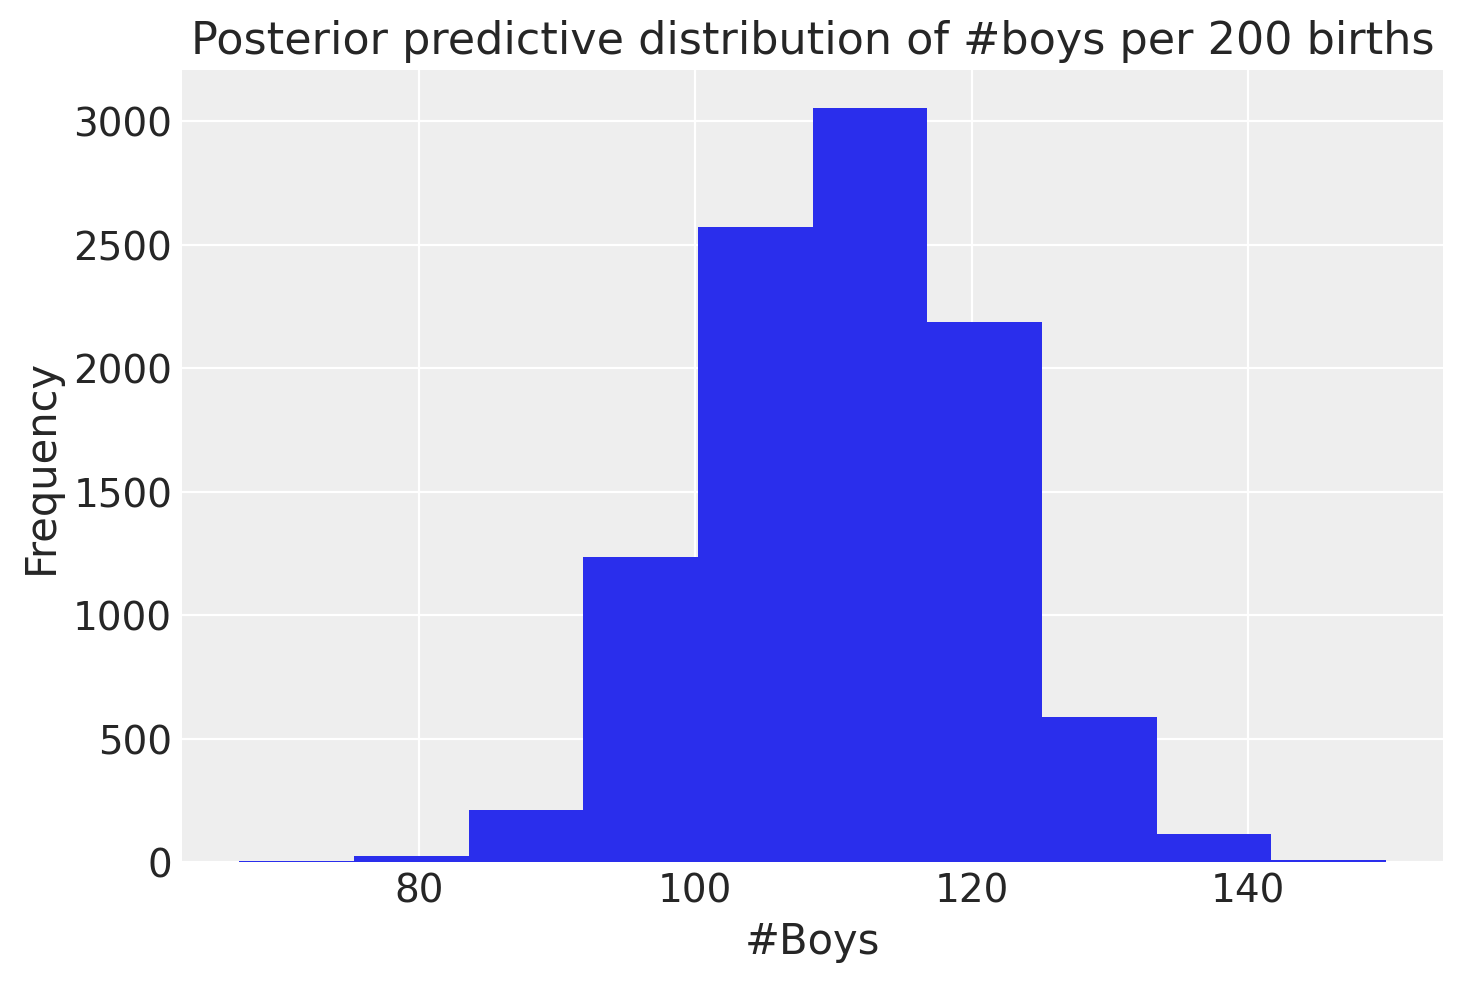

In [25]:
ppd = np.random.binomial(200, samples)

plt.hist(ppd)
plt.title("Posterior predictive distribution of #boys per 200 births")
plt.xlabel("#Boys")
plt.ylabel("Frequency");

## 3H4
Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, birth1. How does the model look in this light?

I take this to mean, using the posterior distribution, from the full data set, what is your posterior predictive distribution for the trials of 100 births, and how does this compare to the 100 births actually observed in the birth1 data.


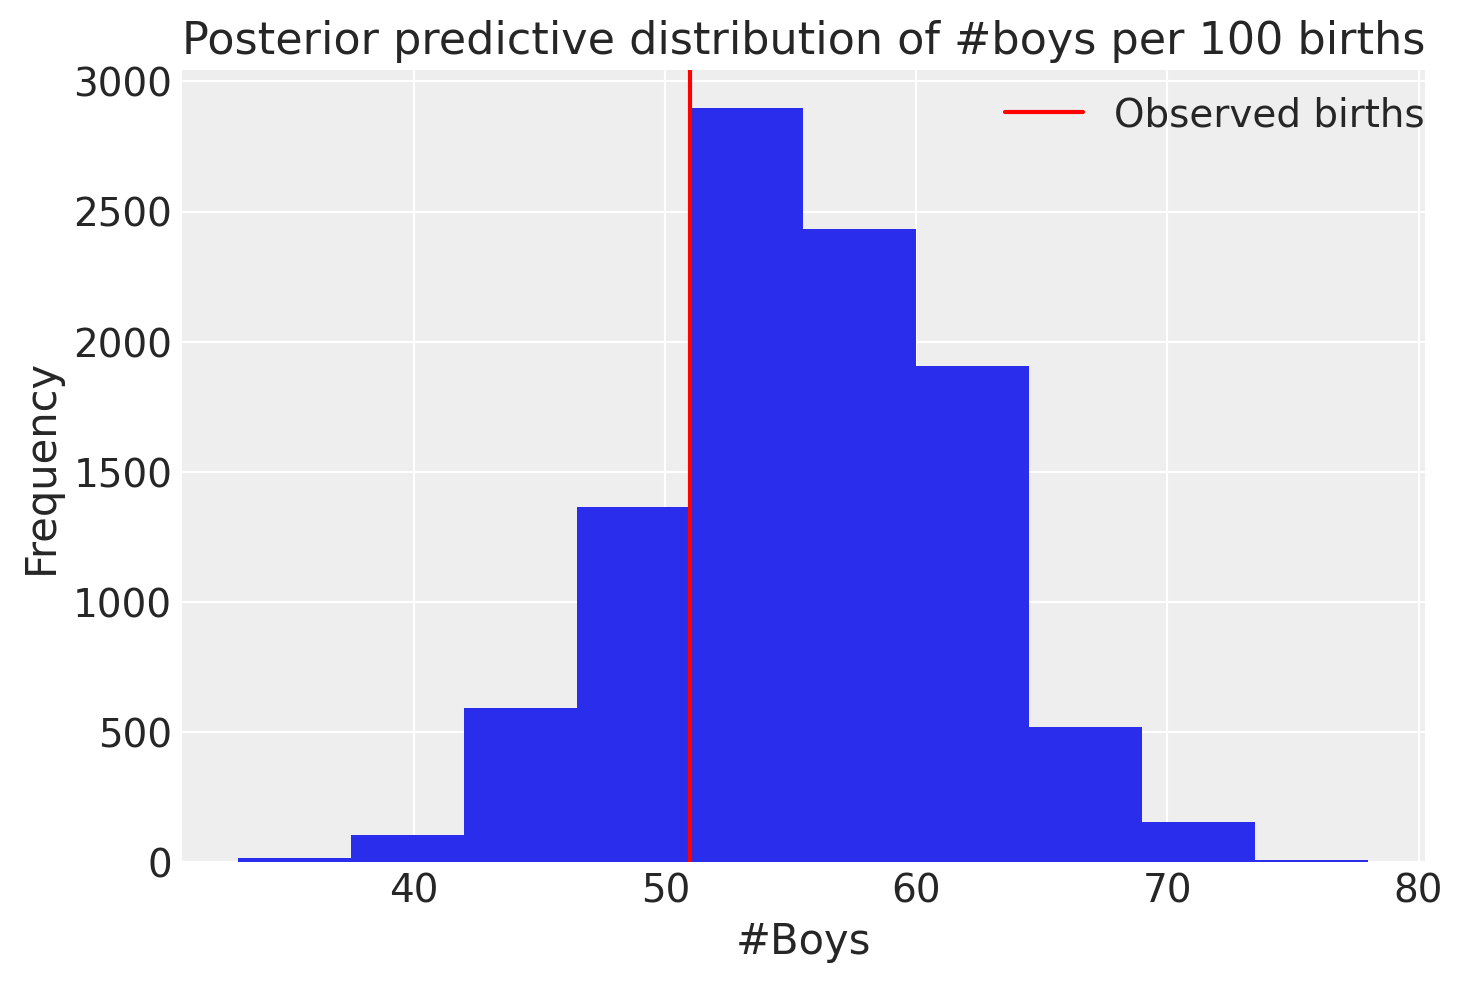

In [27]:
ppd100 = np.random.binomial(n=100, p=samples)

plt.hist(ppd100)
plt.title("Posterior predictive distribution of #boys per 100 births")
plt.xlabel("#Boys")
plt.ylabel("Frequency")
plt.axvline(np.sum(birth1), c="r", label="Observed births")
plt.legend(loc=(0.65, 0.9))

## 3H5
The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?


In [29]:
f1 = birth1 == 0
m2f1 = birth2[f1]
print(f"Total female first births: {len(m2f1)}")
print(f"Total Male followed by female births: {sum(m2f1)}" )

Total female first births: 49
Total Male followed by female births: 39


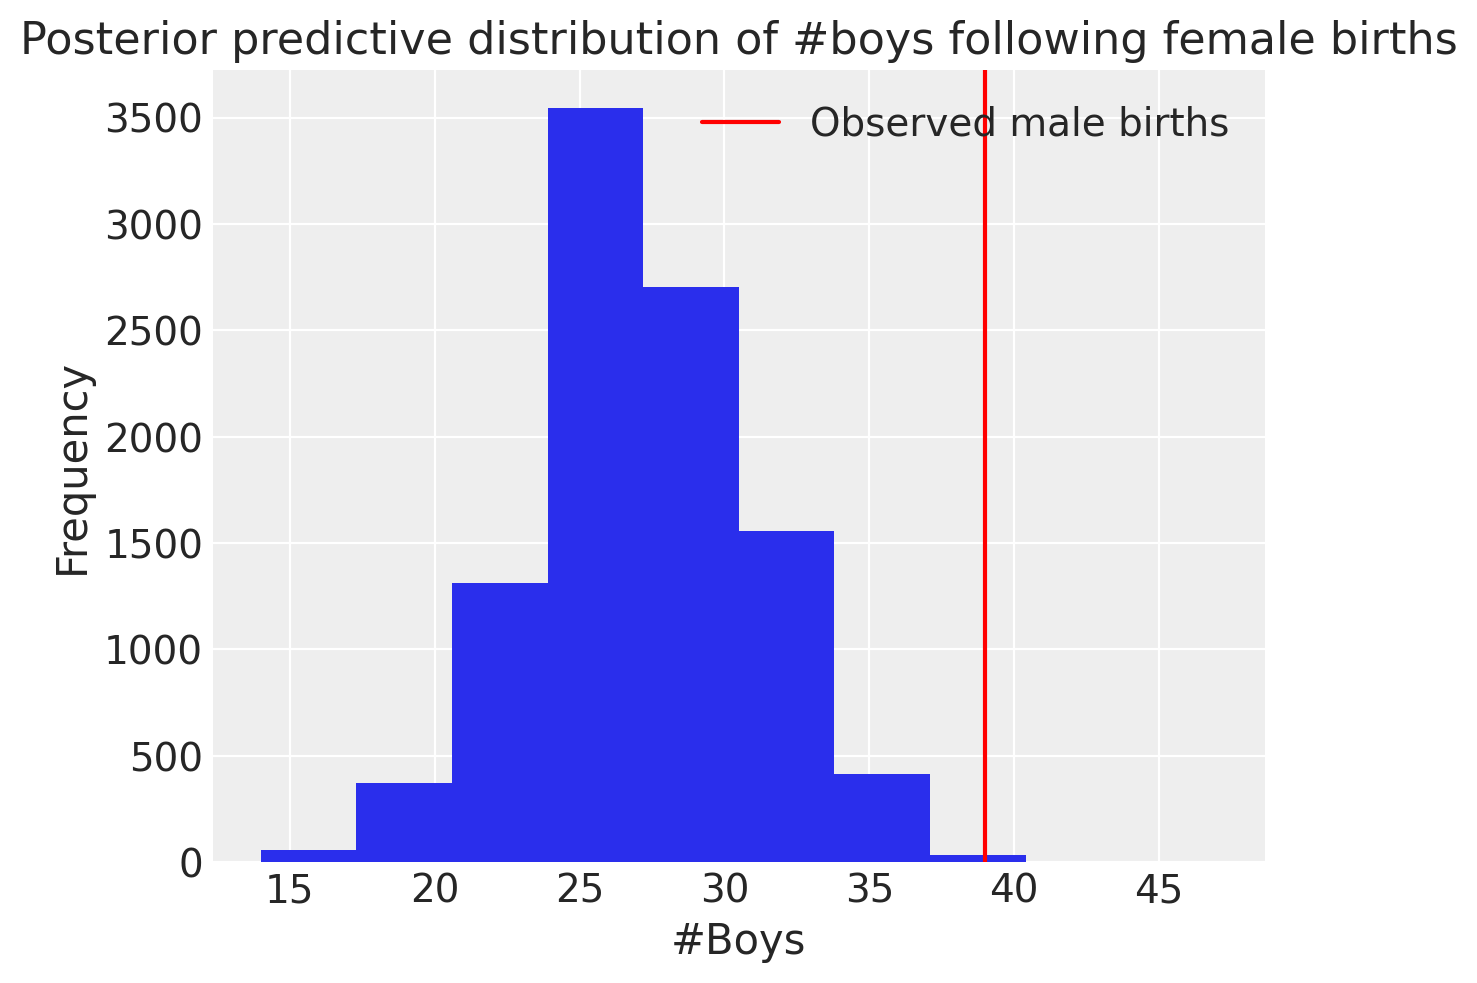

In [33]:
ppd_mAf = np.random.binomial(n=49, p=samples)

plt.hist(ppd_mAf)
plt.title("Posterior predictive distribution of #boys following female births")
plt.xlabel("#Boys")
plt.ylabel("Frequency")
plt.axvline(sum(m2f1), c="r", label="Observed male births")
plt.legend()

In [34]:
%watermark -n -u -v -iv -w

Last updated: Sat Mar 20 2021

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

numpy     : 1.19.5
matplotlib: 3.2.2
pymc3     : 3.7
arviz     : 0.11.2
scipy     : 1.4.1
IPython   : 5.5.0

Watermark: 2.2.0

